# Regresión lineal

## Mínimos cuadrados

In [5]:
import numpy as np
from numpy.linalg import inv 
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm

### 1. Tabla de mínimos cuadrados

In [6]:
x = [5, 3, 3, 1, 2, 2, 4]
y = [70, 70, 60, 40, 35, 40, 50]
X = sm.add_constant(x)

In [7]:
xy = []
xx = []
for i in range(len(x)):
  xy.append(x[i]*y[i])
  xx.append(x[i]*x[i])

In [8]:
ls_table = [[x], [y], [xy], [xx]]
ls_table

[[[5, 3, 3, 1, 2, 2, 4]],
 [[70, 70, 60, 40, 35, 40, 50]],
 [[350, 210, 180, 40, 70, 80, 200]],
 [[25, 9, 9, 1, 4, 4, 16]]]

In [9]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

/Users/nasa_penguin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     5.893
Date:                Fri, 18 Feb 2022   Prob (F-statistic):             0.0596
Time:                        15:39:42   Log-Likelihood:                -25.473
No. Observations:                   7   AIC:                             54.95
Df Residuals:                       5   BIC:                             54.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2105     10.305      2.835      0.036       2.721      55.700
x1             8.0263      3.306      2.428      0.060      -0.473      16.525
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.019
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.418
Skew:                           0.424   Prob(JB):                        0.811
Kurtosis:                       2.153   Cond. No.                         8.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Coeficiente de Pearson

In [10]:
pearson = np.corrcoef(x, y)[0][1]
pearson

0.7355272196065922

### 3. Coeficiente de determinación

In [11]:
coef = results.params[1]
coef

8.026315789473689

### 4. Pendiente de la tangente

In [12]:
def slope(x1,y1,x2,y2):
    x = (y2 - y1) / (x2 - x1)
    return x

In [13]:
slope(x[0], y[0], x[2], y[2])

5.0

### 5. Ordenada al origen

In [14]:
intercept = results.params[0]
intercept

29.21052631578948

### 6. Establece la recta de regresión

In [15]:
ec = f"y = {coef} x + {intercept}"
ec

'y = 8.026315789473689 x + 29.21052631578948'

### 7. Dibuja la gráfica de dispersión

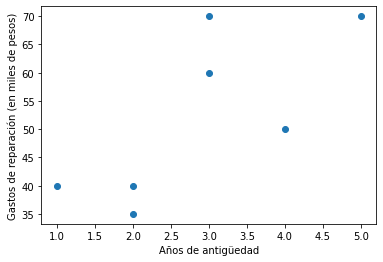

In [16]:
plt.scatter(x, y); plt.xlabel('Años de antigüedad'); plt.ylabel('Gastos de reparación (en miles de pesos)');

### 8. Línea de tendencia

In [17]:
y_pred = results.predict(X)

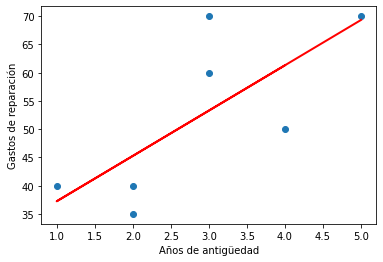

In [20]:
plt.scatter(x, y); plt.xlabel('Años de antigüedad'); plt.ylabel('Gastos de reparación');
plt.plot(x, y_pred, c='red', linewidth=2)
plt.show()

### 9. Conclusión

No existe una relación lineal entre los años de antigüedad y los gastos de reparación, por lo que no es recomendable confiar en este modelo, la efectividad es aproximadamente del 54% (r cuadrada).